# Financial Mathematics Project 1
## Daniel Cohen, Brian Livian

### Formulas
<font size="8"> ${C} = \frac{P\frac{r}{m}}{1-(1 - \frac{r}{m})^{-N}  } $ </font>


<font size="8"> $R(n)=P\frac{(1+\frac{r}{m})^N-(1+\frac{r}{m})^{n-1}}{(1+\frac{r}{m})^N-1}(\frac{r}{m})$ </font>

<font size="8"> ${A(n)} = \frac{P\frac{r}{m}(1-\frac{r}{m})^{n-1}}{(1+\frac{r}{m})^N - 1}  $ </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

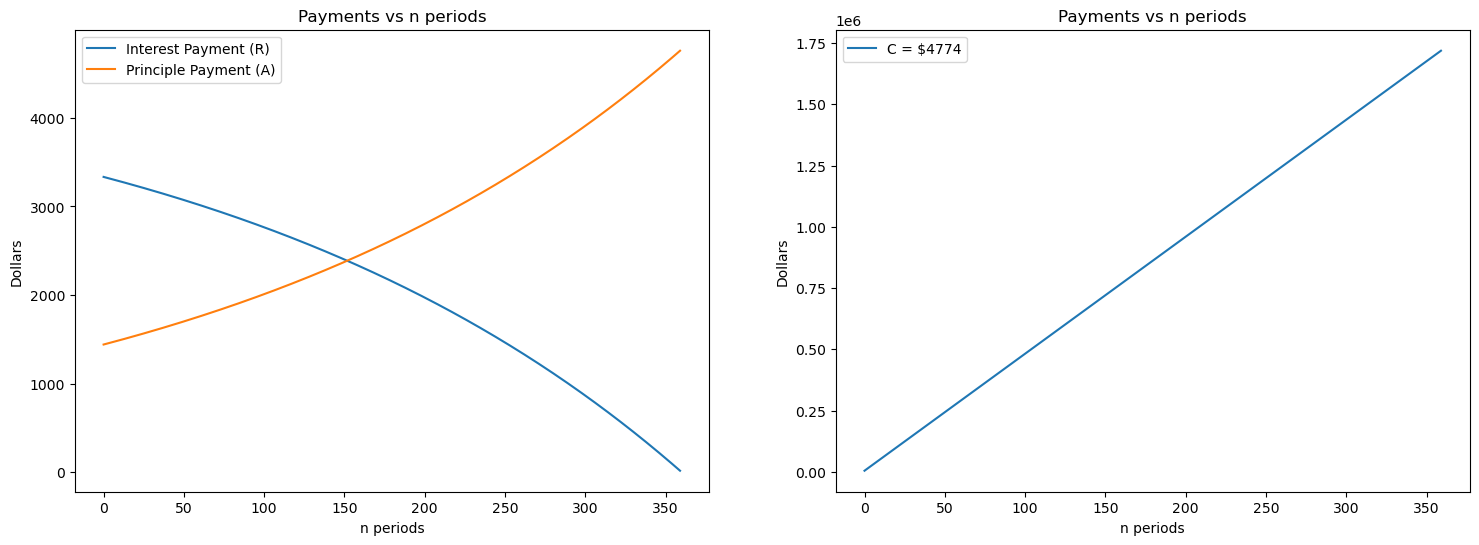

Total payment 1718695.0636756336
C 4774.152954654538


,R,A
0,3333.333333,1440.819621
1,3328.530601,1445.622353
2,3323.711860,1450.441095
3,3318.877056,1455.275898
4,3314.026137,1460.126818
...,...,...
355,78.779671,4695.373283
356,63.128427,4711.024527
357,47.425012,4726.727943
358,31.669252,4742.483702


In [2]:
def c(p, r, T, m):
    N = m*T
    rm = r/m
    return (p*(rm)) / (1-(1+(rm))**-N)
def Rn(p, r, n, T, m):
    N = m*T
    rm = r/m
    return p * (rm) * (((1+ rm)**N) - (1+rm)**(n-1)) / (((1+rm)**N) -1)
def An(p, r, n, T, m):
    N = m*T
    rm = r/m
    return p * (rm*(1 +rm)**(n-1)) / ( ((1+rm)**N) -1 )
def r(r, m, T):
    N = m*T
    return (((1+r)**(1/m)) - 1)*m

p = 1000000
r= .04
T = 30
m = 12
N = T * m
R = []
A = []

C = c(p, r, T, m)

for n in range(1,N +1):
    R.append(Rn(p, r, n, T,m))
    A.append(An(p, r, n, T,m))
df = pd.DataFrame({
    'R' : R,
    'A' : A
})


figure(figsize = (18,6))
plt.subplot(1,2,1)
plt.plot(df['R'], label = 'Interest Payment (R)')
plt.plot(df['A'], label = 'Principle Payment (A)')
plt.ylabel('Dollars')
plt.xlabel('n periods')
plt.title('Payments vs n periods')
plt.legend()
plt.subplot(1,2,2)
plt.plot(np.cumsum(df['R'] + df['A']), label = 'C = $' + str(round(C)))
plt.ylabel('Dollars')
plt.xlabel('n periods')
plt.legend()
plt.title('Payments vs n periods')
# plt.savefig(r'C:\Users\brian.livian\OneDrive - Interpublic\Desktop\Figure3.pdf')
plt.show()

print('Total payment ' + str(df['A'].sum() + df['R'].sum()))
print('C ' + str(C))
df